# Modelos a nivel departamental

In [1]:
import machine_learning_tool
from machine_learning_tool import MLPipelineSD
from importlib import reload
import pandas as pd
reload(machine_learning_tool)

<module 'machine_learning_tool' from 'C:\\Users\\danny\\Documents\\Unal\\Maestria_2018_2\\Tesis\\MLPipeline\\machine_learning_tool.py'>

In [2]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="departamental models")

In [3]:
df=model.get_pure_dataset(MLPipelineSD.monthly)

In [4]:
df_only_departamentos=df["departamento"]

In [5]:
df_only_departamentos_drop=df_only_departamentos.drop_duplicates()

In [6]:
df_only_departamentos_drop.values

array(['ANTIOQUIA', 'ATLANTICO', 'CUNDIMARCA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CAUCA', 'CESAR', 'CORDOBA', 'CHOCO', 'HUILA',
       'GUAJIRA', 'MAGDALE', 'META', 'NARIÑO', 'NORTE SANTANDER',
       'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'ARAUCA', 'CASARE', 'PUTUMAYO', 'GUAVIARE', 'VICHADA'],
      dtype=object)

In [7]:
departamentos_list=['ANTIOQUIA', 'ATLANTICO', 'CUNDIMARCA', 'BOLIVAR', 'BOYACA',
       'CALDAS', 'CAQUETA', 'CAUCA', 'CESAR', 'CORDOBA', 'CHOCO', 'HUILA',
       'GUAJIRA', 'MAGDALE', 'META', 'NARIÑO', 'NORTE SANTANDER',
       'QUINDIO', 'RISARALDA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE',
       'ARAUCA', 'CASARE', 'PUTUMAYO', 'GUAVIARE', 'VICHADA']

In [8]:
variables_mean=['antropica', 'bosques', 'cultivos.permanentes',
       'cultivos.transitorios', 'herbazales', 'mosaico', 'pastos',
       'vegetacion.secundaria', 'zonas.acuaticas', 'otras.coberturas', 'arido',
       'seco', 'humedo', 'pluvial', 'msnm', 'minmsnm', 'maxmsnm', 'rango.msnm',
       'deforestacion05.16', 'cuerpos.de.agua', 'zos.inundables',
       'zos.susceptibles.de.inundacion', 'temperatura', 'min.temperatura',
       'max.temperatura', 'precipitacion', 'min.precipitacion',
       'max.precipitacion', 'Cobertura neta en educación secundaria',
       'Puntaje promedio Pruebas Saber 11 - Lectura crítica',
       'Tasa de mortalidad infantil en menores de 5 años ',
       'Cobertura vacunación pentavalente en menores de 1 año',
       'Cobertura de acueducto (REC)', 'Densidad poblacional',
       'Ingresos totales per cápita',
       'Tasa de homicidios (x cada 100.000 habitantes)',
'Tasa de hurtos (x cada 100.000 habitantes)',
'Disparidades_Económicas',
'DIMENSION URBANA ',
       'DIMENSIÓN ECONOMICA', 'DIMENSIÓN CALIDAD DE VIDA',
       'DIMENSIÓN SEGURIDAD', 'Temperatura', 'Precipitación', 'AltTemp',
       'AltPrec', 'PromedioTemp', 'PromedioPrec', 'EVI', 'NDVI',
'promedio_poblacion']

In [9]:
variables_sum=['Número de personas secuestradas',
       'Número de personas desplazadas', 'Crecimiento_Pob',
'Hectareas_Coca',
'casos_',
       'total_poblacion', 'areakm2']

In [10]:
df_dates= pd.DataFrame()

In [11]:
df_dates["año"]=df["año"]
df_dates["Semana/Mes"]=df["Semana/Mes"]
df_dates["Fecha"]=df["Fecha"]
df_dates["periodo"]=df["periodo"]

In [12]:
df_dates_final=df_dates.groupby("periodo").first().reset_index()

In [13]:
df_final= pd.DataFrame()
df_departamental_complete=pd.DataFrame()

In [14]:
for i in range(len(departamentos_list)):
    dept= pd.DataFrame()
    dept_final=pd.DataFrame()
    dept=df["departamento"]==departamentos_list[i]
    dept=df[dept]
           
    for variable_sum in variables_sum:
        dept_final[variable_sum]=dept.groupby(by="periodo").sum()[variable_sum].values
    for variable_mean in variables_mean:
        dept_final[variable_mean]=dept.groupby(by="periodo").mean()[variable_mean].values
    
    dept_final["departamento"]=departamentos_list[i]
    
    df_final=pd.concat([df_dates_final, dept_final], axis=1)
    df_departamental_complete=pd.concat([df_departamental_complete, df_final])
    

In [15]:
#df.groupby(['periodo','departamento']).sum()

In [16]:
df_departamental_complete

,periodo,año,Semana/Mes,Fecha,Número de personas secuestradas,Número de personas desplazadas,Crecimiento_Pob,Hectareas_Coca,casos_,total_poblacion,...,Temperatura,Precipitación,AltTemp,AltPrec,PromedioTemp,PromedioPrec,EVI,NDVI,promedio_poblacion,departamento
0,1,2007,1,200701,655.0,350219.0,2.680018,2725.0,2,5835008,...,19.302851,165.149014,-0.366279,1.319880,19.669131,124.362346,4662.334371,7437.483932,49468.0152,ANTIOQUIA
1,2,2007,2,200702,655.0,350219.0,2.680018,2725.0,2,5835008,...,18.802815,62.628895,-1.232661,0.480695,20.035477,132.956883,4441.590615,7323.212249,49468.0152,ANTIOQUIA
2,3,2007,3,200703,655.0,350219.0,2.680018,2725.0,5,5835008,...,19.360771,263.974318,-0.876516,1.581123,20.237287,168.693883,4355.517605,6982.517171,49468.0152,ANTIOQUIA
3,4,2007,4,200704,655.0,350219.0,2.680018,2725.0,0,5835008,...,19.016296,427.218193,-1.173439,1.599887,20.189735,271.430109,4736.043703,7379.696525,49468.0152,ANTIOQUIA
4,5,2007,5,200705,655.0,350219.0,2.680018,2725.0,7,5835008,...,18.971521,449.881437,-1.084022,1.405479,20.055544,321.627905,5026.550084,7593.474530,49468.0152,ANTIOQUIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2016,8,201608,23.0,12437.0,0.403003,1242.0,0,73702,...,25.455578,265.028917,-0.206076,0.867866,25.661655,300.074455,3557.469590,6328.546209,16545.7500,VICHADA
116,117,2016,9,201609,23.0,12437.0,0.403003,1242.0,1,73702,...,26.001361,291.585198,-0.335814,1.133235,26.337175,258.398796,3485.983563,6236.510158,16545.7500,VICHADA
117,118,2016,10,201610,23.0,12437.0,0.403003,1242.0,0,73702,...,26.520095,325.664516,-0.183843,1.477676,26.703938,223.434518,3473.649777,6394.563470,16545.7500,VICHADA
118,119,2016,11,201611,23.0,12437.0,0.403003,1242.0,0,73702,...,26.384729,287.535825,-0.459134,1.809624,26.843863,165.437653,3568.805864,6450.111721,16545.7500,VICHADA


In [17]:
#Calculo de la incidencia por cada 100.000 habitantes
total = df_departamental_complete
total_popu=df_departamental_complete["total_poblacion"]
weekly_incidence = (total["casos_"]*100000/total_popu)

weekly_incidence.rename('incidencia_', inplace = True)
df_departamental_complete = pd.concat([total, weekly_incidence], axis=1)


In [18]:
df_departamental_complete

,periodo,año,Semana/Mes,Fecha,Número de personas secuestradas,Número de personas desplazadas,Crecimiento_Pob,Hectareas_Coca,casos_,total_poblacion,...,Precipitación,AltTemp,AltPrec,PromedioTemp,PromedioPrec,EVI,NDVI,promedio_poblacion,departamento,incidencia_
0,1,2007,1,200701,655.0,350219.0,2.680018,2725.0,2,5835008,...,165.149014,-0.366279,1.319880,19.669131,124.362346,4662.334371,7437.483932,49468.0152,ANTIOQUIA,0.034276
1,2,2007,2,200702,655.0,350219.0,2.680018,2725.0,2,5835008,...,62.628895,-1.232661,0.480695,20.035477,132.956883,4441.590615,7323.212249,49468.0152,ANTIOQUIA,0.034276
2,3,2007,3,200703,655.0,350219.0,2.680018,2725.0,5,5835008,...,263.974318,-0.876516,1.581123,20.237287,168.693883,4355.517605,6982.517171,49468.0152,ANTIOQUIA,0.085690
3,4,2007,4,200704,655.0,350219.0,2.680018,2725.0,0,5835008,...,427.218193,-1.173439,1.599887,20.189735,271.430109,4736.043703,7379.696525,49468.0152,ANTIOQUIA,0.000000
4,5,2007,5,200705,655.0,350219.0,2.680018,2725.0,7,5835008,...,449.881437,-1.084022,1.405479,20.055544,321.627905,5026.550084,7593.474530,49468.0152,ANTIOQUIA,0.119966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2016,8,201608,23.0,12437.0,0.403003,1242.0,0,73702,...,265.028917,-0.206076,0.867866,25.661655,300.074455,3557.469590,6328.546209,16545.7500,VICHADA,0.000000
116,117,2016,9,201609,23.0,12437.0,0.403003,1242.0,1,73702,...,291.585198,-0.335814,1.133235,26.337175,258.398796,3485.983563,6236.510158,16545.7500,VICHADA,1.356815
117,118,2016,10,201610,23.0,12437.0,0.403003,1242.0,0,73702,...,325.664516,-0.183843,1.477676,26.703938,223.434518,3473.649777,6394.563470,16545.7500,VICHADA,0.000000
118,119,2016,11,201611,23.0,12437.0,0.403003,1242.0,0,73702,...,287.535825,-0.459134,1.809624,26.843863,165.437653,3568.805864,6450.111721,16545.7500,VICHADA,0.000000


In [22]:
#df_departamental_complete.save
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df_departamental_complete.to_csv('mensual_departamental.csv', index=False)

## Modelo de regresion_

### incidencia_

In [65]:
df_departamental_complete["casos_"].mean()

26.899404761904762

In [61]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

[08:34:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 11.655913967285155
mean_squared_error 517.6850902308428
r2_score 0.7357059616524373
explained_variance_score 0.7358783422208738


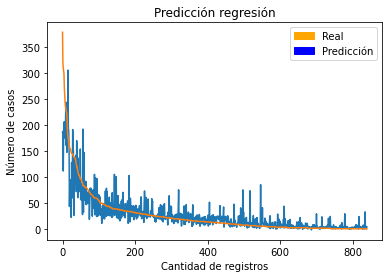

In [62]:
model.run(classification=False, test_size=0.25, feature_scaling_function=model.standardization, model_function=model.XGBRegressor, hyperparameters={}, random_sate=None , show_metrics=True, inv_feature_scaling=True, no_zeros_ds=False)

### casos_

In [56]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:59:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Training and test predicting phase finished 

mean_absolute_error 11.655913967285155
mean_squared_error 517.6850902308428
r2_score 0.7357059616524373
explained_variance_score 0.7358783422208738


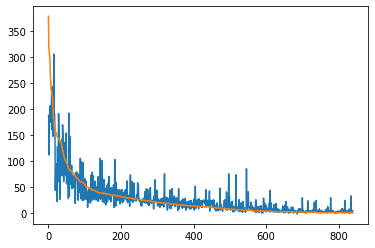

In [57]:
model.run(classification=False, test_size=0.25, feature_scaling_function=model.standardization, model_function=model.XGBRegressor, hyperparameters={}, random_sate=None , show_metrics=True, inv_feature_scaling=True, no_zeros_ds=False)

## Modelo de clasificación

### XGBoost (INCIDENCIA) 2 clases

In [58]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='incidencia_', description="No description", delete_columns_white_sapaces=False)

In [59]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.XGBClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed


 Training and test predicting phase finished 

confusion_matrix [[366  53]
 [ 34 387]]
accuracy 0.8964285714285715
precision_0 0.915
recall_0 0.8735083532219571
f1_score_0 0.8937728937728938
precision_1 0.8795454545454545
recall_1 0.9192399049881235
f1_score_1 0.8989547038327526
precision_macro 0.8972727272727272
recall_macro 0.8963741291050402
f1_macro 0.8963637988028232
classification_report
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       419
           1       0.88      0.92      0.90       421

    accuracy                           0.90       840
   macro avg       0.90      0.90      0.90       840
weighted avg       0.90      0.90      0.90       840



### XGBoost (CASOS) 2 clases

In [60]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

In [61]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.XGBClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 Training and test predicting phase finished 

confusion_matrix [[ 89  14]
 [104 633]]
accuracy 0.8595238095238096
precision_0 0.46113989637305697
recall_0 0.8640776699029126
f1_score_0 0.6013513513513513
precision_1 0.9783616692426584
recall_1 0.858887381275441
f1_score_1 0.9147398843930636
precision_macro 0.7197507828078578
recall_macro 0.8614825255891767
f1_macro 0.7580456178722075
classification_report
              precision    recall  f1-score   support

           0       0.46      0.86      0.60       103
           1       0.98      0.86      0.91       737

    accuracy                           0.86       840
   macro avg       0.72      0.86      0.76       840
weighted avg       0.91      0.86      0.88       840



### MLP (INCIDENCIA) 2 clases

In [62]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='incidencia_', description="No description", delete_columns_white_sapaces=False)

In [63]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.kerasMLPClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
W0418 10:59:45.044337 16424 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0418 10:59:45.045336 16424 deprecation_wrapper.py:119] From C:\Users\Daniel\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0418 10:5

Epoch 1/150
2282/2282 [==============================] - 1s 271us/step - loss: 0.5757 - acc: 0.8124
Epoch 2/150
2282/2282 [==============================] - 0s 32us/step - loss: 0.3905 - acc: 0.8545
Epoch 3/150
2282/2282 [==============================] - 0s 32us/step - loss: 0.3007 - acc: 0.8777
Epoch 4/150
2282/2282 [==============================] - 0s 32us/step - loss: 0.2627 - acc: 0.8992
Epoch 5/150
2282/2282 [==============================] - 0s 32us/step - loss: 0.2470 - acc: 0.9102
Epoch 6/150
2282/2282 [==============================] - 0s 33us/step - loss: 0.2390 - acc: 0.9084
Epoch 7/150
2282/2282 [==============================] - 0s 33us/step - loss: 0.2328 - acc: 0.9106
Epoch 8/150
2282/2282 [==============================] - 0s 34us/step - loss: 0.2285 - acc: 0.9132
Epoch 9/150
2282/2282 [==============================] - 0s 33us/step - loss: 0.2286 - acc: 0.9080
Epoch 10/150
2282/2282 [==============================] - 0s 34us/step - loss: 0.2283 - acc: 0.9110
Epoch 11

### MLP (CASOS_) 2 clases

In [64]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, dataset=df_departamental_complete, columns_list=None,
               only_numeric=True, objective_variable='casos_', description="No description", delete_columns_white_sapaces=False)

In [65]:
model.run(classification=True, test_size=0.25, feature_scaling_function=model.standardization, sampling={"method":model.imSMOTETomekOversamplingUndersampling, "shuffle":False},
          model_function=model.kerasMLPClassifier, hyperparameters={}, random_sate=None , show_metrics=True, no_zeros_ds=False)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Documents\Unal\Maestria_2018_2\Tesis\MLPipeline\machine_learning_tool.py:649: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=53, units=128, kernel_initializer="uniform")`
  classifier.add(Dense(output_dim=128, init='uniform', activation='relu', input_dim=len(self.X_train.columns)))
C:\Users\Daniel\Documents\Unal\Maestria_2018_2\Tesis\MLPipeline\machine_learning_tool.py:651: UserWarning: Update your `Dropout` call to the K

Epoch 1/150
4348/4348 [==============================] - 1s 196us/step - loss: 0.5172 - acc: 0.8091
Epoch 2/150
4348/4348 [==============================] - 0s 32us/step - loss: 0.3482 - acc: 0.8565
Epoch 3/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.3048 - acc: 0.8781
Epoch 4/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2843 - acc: 0.8864
Epoch 5/150
4348/4348 [==============================] - 0s 31us/step - loss: 0.2777 - acc: 0.8848
Epoch 6/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2725 - acc: 0.8914
Epoch 7/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2678 - acc: 0.8921
Epoch 8/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2677 - acc: 0.8903
Epoch 9/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2612 - acc: 0.8933
Epoch 10/150
4348/4348 [==============================] - 0s 30us/step - loss: 0.2631 - acc: 0.8928
Epoch 11

## Porcentaje de casos ceros

In [66]:
mayor0=df_departamental_complete.query('casos_ > 0').count()["casos_"]

In [67]:
cero0=df_departamental_complete.query('casos_ <= 0').count()["casos_"]

In [68]:
total=mayor0+cero0

In [69]:
cero0*1/total

0.12261904761904761

## Distribución de los datos

In [70]:
model.dataset["casos_"].value_counts()

0      412
1      273
2      196
3      133
6      110
4      101
5       87
7       83
11      79
8       66
9       65
12      63
14      62
16      61
13      60
15      59
10      57
19      55
17      54
23      50
21      47
18      47
28      47
20      46
25      42
22      39
34      38
26      37
33      34
30      34
      ... 
228      1
156      1
158      1
160      1
170      1
172      1
178      1
194      1
198      1
204      1
208      1
216      1
218      1
224      1
242      1
514      1
244      1
254      1
270      1
274      1
296      1
298      1
304      1
356      1
378      1
404      1
410      1
418      1
471      1
436      1
Name: casos_, Length: 215, dtype: int64

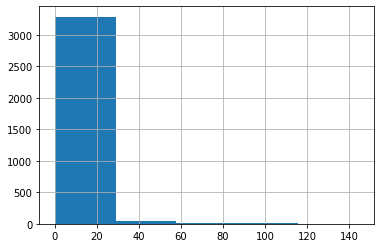

In [71]:
hist1 = df_departamental_complete["incidencia_"].hist(bins=5)

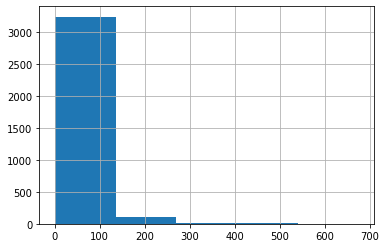

In [72]:
hist2 = df_departamental_complete["casos_"].hist(bins=5)

## Clasificacion con más de 2 clases

In [73]:
model = MLPipelineSD(dataset_type=MLPipelineSD.monthly, description="3 clases")

In [74]:
model.run(feature_scaling_function=model.standardization, model_function=model.XGBClassifier, sampling={'method':model.imSMOTETomekOversamplingUndersampling, "shuffle": True},
         class_ranges=[0,3,5], show_metrics=True)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


[11:05:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[11:05:22] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[11:05:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[11:05:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=7
[11:05:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=7
[11:05:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=7
[11:05:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[11:05:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=7
[11:05:25] INFO: src/tree/updater_prune.cc:74: t

[11:05:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 0 pruned nodes, max_depth=7
[11:05:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[11:05:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[11:05:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=7
[11:05:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[11:05:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 0 pruned nodes, max_depth=7
[11:05:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[11:05:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=7
[11:05:54] INFO: src/tree/updater_prune.cc:74: t

[11:06:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=7
[11:06:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11:06:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[11:06:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[11:06:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=7
[11:06:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=7
[11:06:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[11:06:21] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=7
[11:06:21] INFO: src/tree/updater_prune.cc:74: tree

[11:06:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[11:06:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=7
[11:06:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[11:06:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[11:06:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[11:06:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[11:06:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=7
[11:06:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[11:06:49] INFO: src/tree/updater_prune.cc:74: tr

[11:07:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[11:07:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[11:07:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=7
[11:07:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=7
[11:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[11:07:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[11:07:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[11:07:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[11:07:18] INFO: src/tree/updater_prune.cc:74: tree